In [8]:

import torch
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

if torch.cuda.is_available():
    import cuml
    import cudf
    import cupy

In [9]:
import os
for dirname, _, filenames in os.walk('/home/cicids2017dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/cicids2017dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/home/cicids2017dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/home/cicids2017dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/home/cicids2017dataset/Monday-WorkingHours.pcap_ISCX.csv
/home/cicids2017dataset/Wednesday-workingHours.pcap_ISCX.csv
/home/cicids2017dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/home/cicids2017dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/home/cicids2017dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


In [10]:
Monday = pd.read_csv('/home/cicids2017dataset/Monday-WorkingHours.pcap_ISCX.csv')

columns = [i.strip() for i in Monday.columns.to_list()]
Monday.columns =  columns

Monday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
Monday['Label'].value_counts()

BENIGN    529918
Name: Label, dtype: int64

In [12]:
len(columns)

79

In [13]:
Tuesday = pd.read_csv('/home/cicids2017dataset/Tuesday-WorkingHours.pcap_ISCX.csv')
Tuesday.columns = columns

Tuesday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
Tuesday['Label'].value_counts()

BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: Label, dtype: int64

In [15]:
Wednesday = pd.read_csv('/home/cicids2017dataset/Wednesday-workingHours.pcap_ISCX.csv')
Wednesday.columns = columns

Wednesday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [16]:
Wednesday['Label'].value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64

In [17]:
benign_Web_attcak_m = pd.read_csv('/home/cicids2017dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
benign_Web_attcak_a = pd.read_csv('/home/cicids2017dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')

Thursday = pd.concat([benign_Web_attcak_m,benign_Web_attcak_a])
Thursday.columns = columns

Thursday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [18]:
Thursday['Label'].value_counts()

BENIGN                        456752
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Name: Label, dtype: int64

In [19]:
benign_Botnet_attcak_m = pd.read_csv('/home/cicids2017dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
benign_PortScan_attcak_a = pd.read_csv('/home/cicids2017dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
benign_Dos_attcak_a = pd.read_csv('/home/cicids2017dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

Friday = pd.concat([benign_Botnet_attcak_m,benign_PortScan_attcak_a,benign_Dos_attcak_a])
Friday.columns = columns

Friday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [22]:
Friday['Label'].value_counts()

BENIGN      414322
PortScan    158930
DDoS        128027
Bot           1966
Name: Label, dtype: int64

In [21]:
PortScan_data = Friday[Friday['Label'] == "PortScan"]
PortScan_mean_values = PortScan_data.mean()


FTP_Patator = Tuesday[Tuesday['Label'] == "FTP-Patator"]

FTP_mean_Patator = FTP_Patator.mean()


xss_data = Thursday[Thursday['Label'] == "Web Attack � XSS"]
xss_mean_data = xss_data.mean()


benign_data = Friday[Friday['Label'] == "BENIGN"]
benign_mean_values = benign_data.mean()

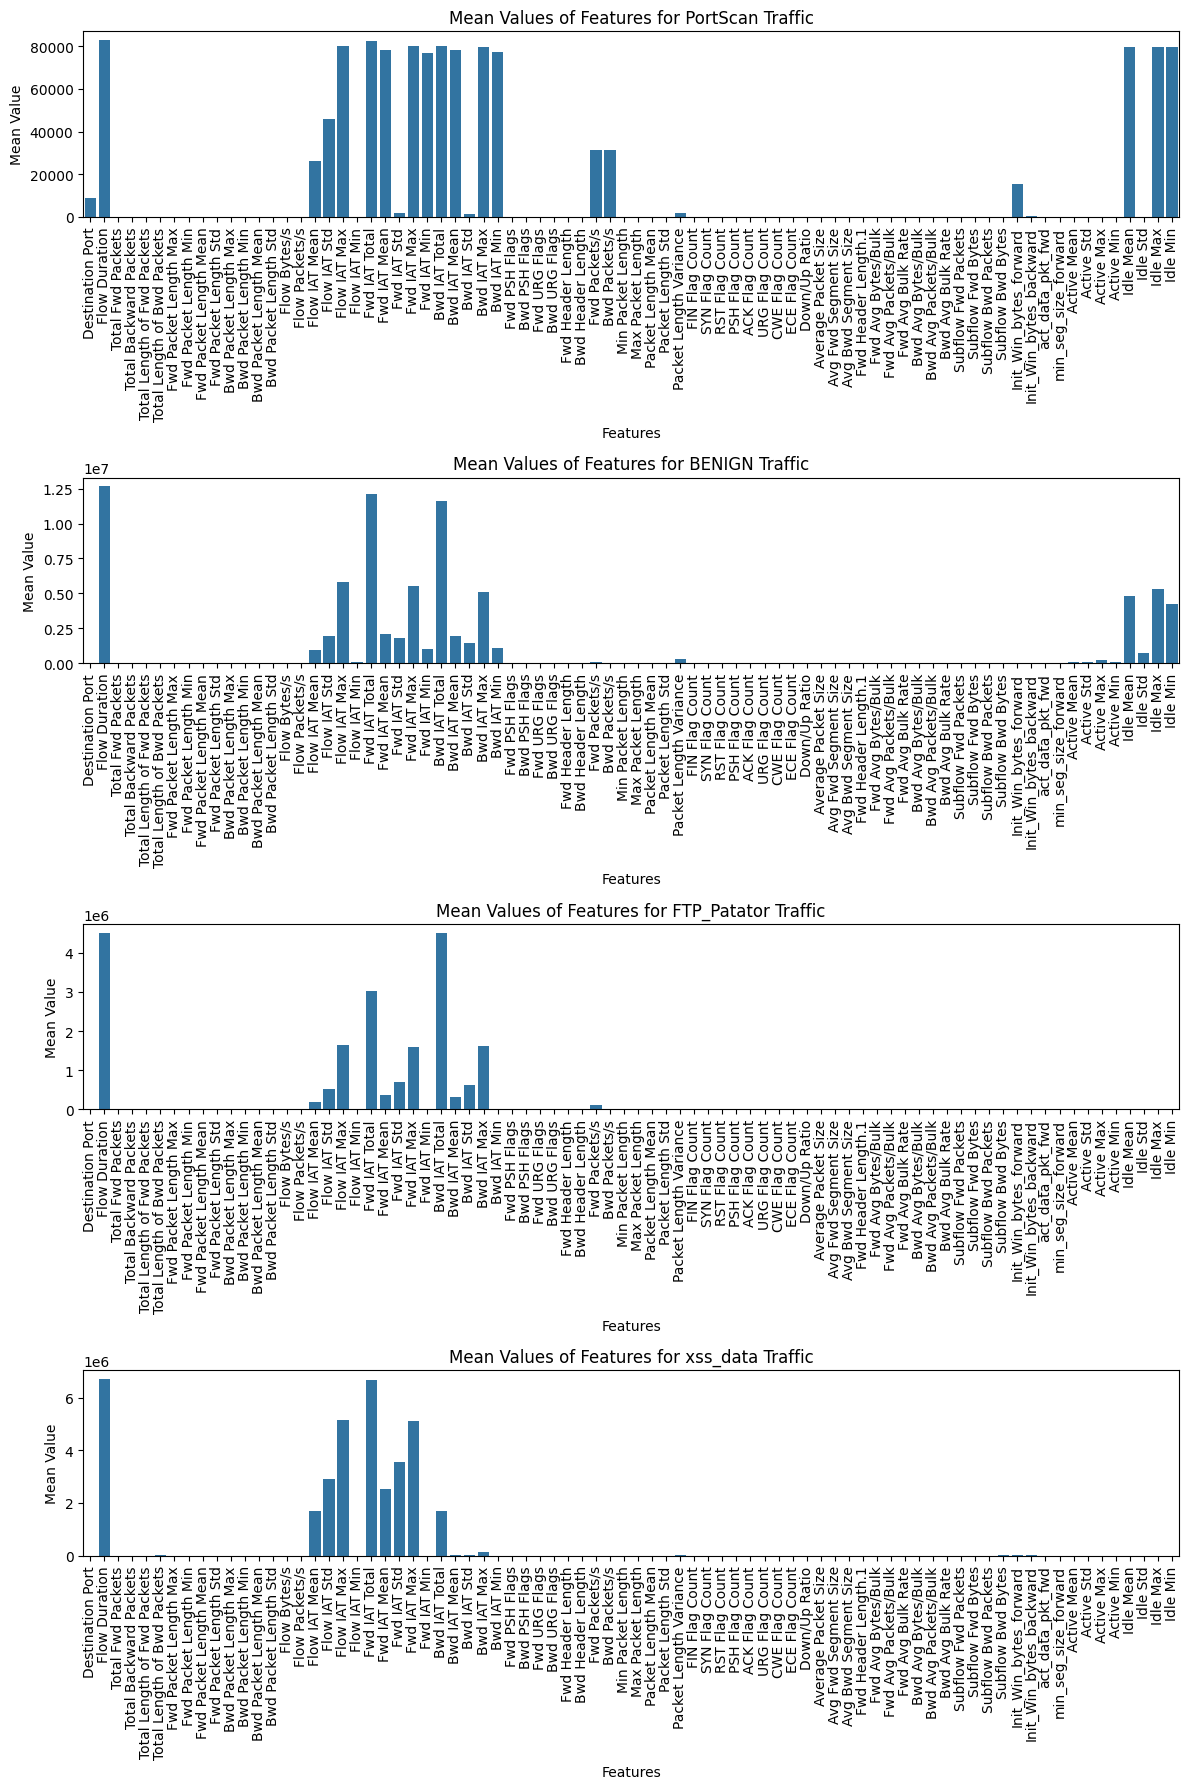

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# PortScan_mean_values benign_mean_values

plt.figure(figsize=(12, 18))

plt.subplot(4, 1, 1)
sns.barplot(x=PortScan_mean_values.index, y=PortScan_mean_values.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for PortScan Traffic")


plt.subplot(4, 1, 2)
sns.barplot(x=benign_mean_values.index, y=benign_mean_values.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for BENIGN Traffic")

plt.subplot(4, 1, 3)
sns.barplot(x=FTP_mean_Patator.index, y=FTP_mean_Patator.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for FTP_Patator Traffic")

plt.subplot(4, 1, 4)
sns.barplot(x=xss_mean_data.index, y=xss_mean_data.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for xss_data Traffic")

plt.tight_layout()

plt.show()

In [24]:

def plot_feature_distribution(df1, df2, label1, label2, features):
    """
    Plots feature distributions for two datasets.

    Parameters:
    - df1: pandas DataFrame for the first dataset
    - df2: pandas DataFrame for the second dataset
    - label1: label for the first dataset
    - label2: label for the second dataset
    - features: list of feature names to plot
    """
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.distplot(df1[feature], label=label1)
        sns.distplot(df2[feature], label=label2)
        plt.legend()
        plt.title(f'Feature Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.show()


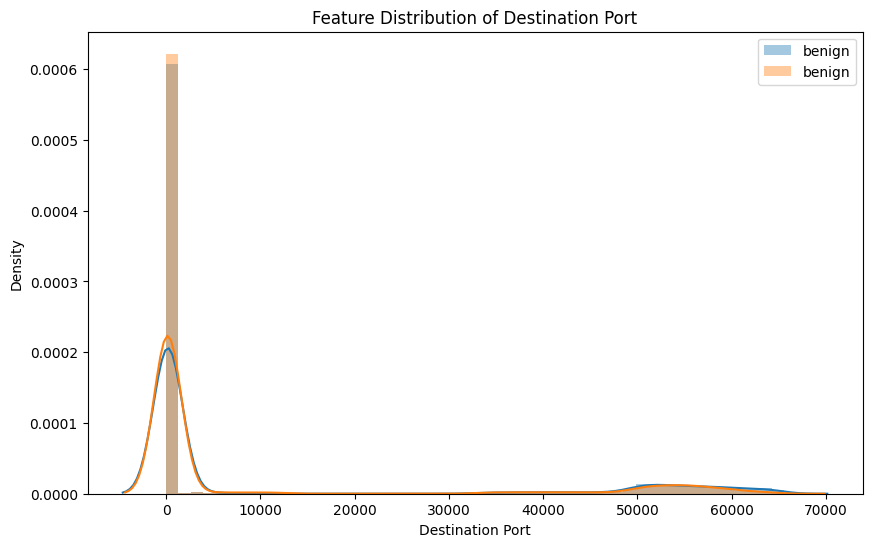

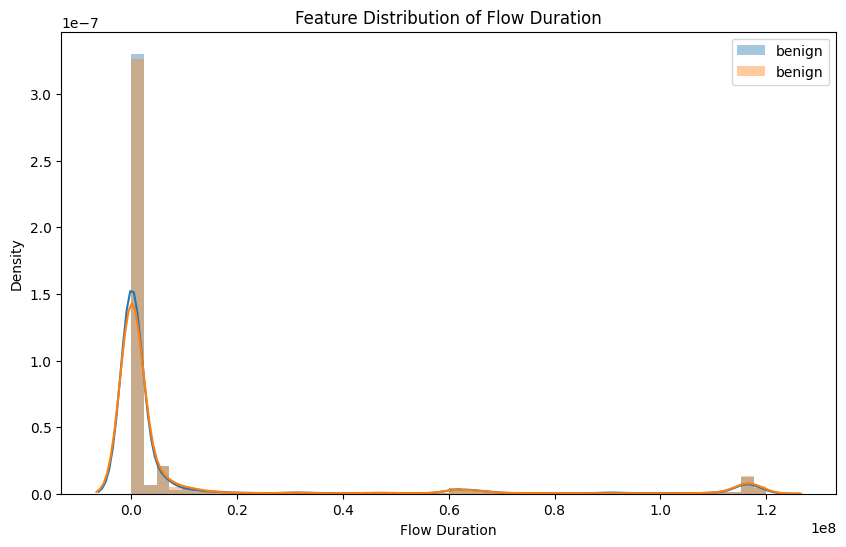

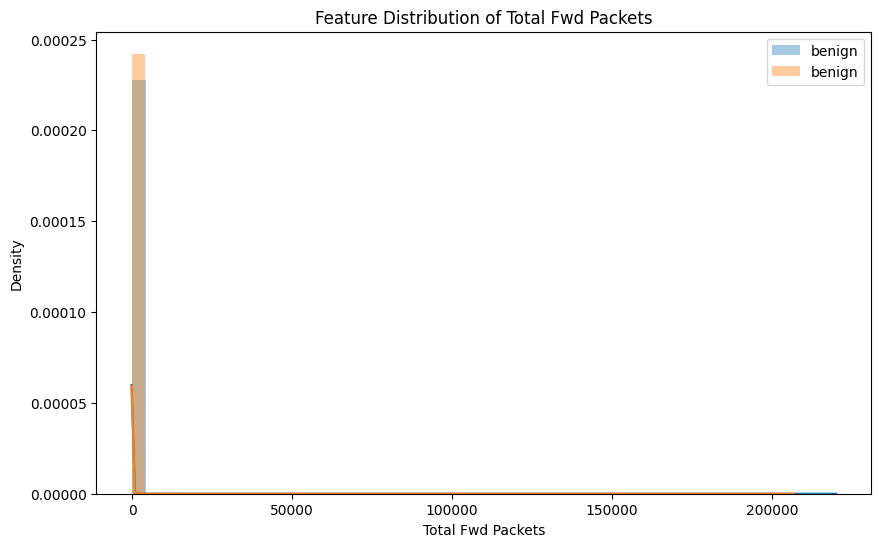

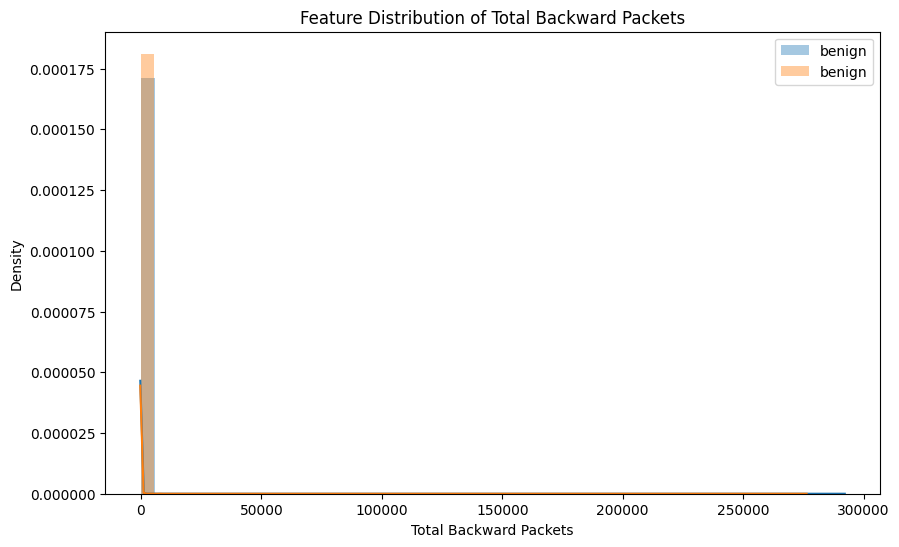

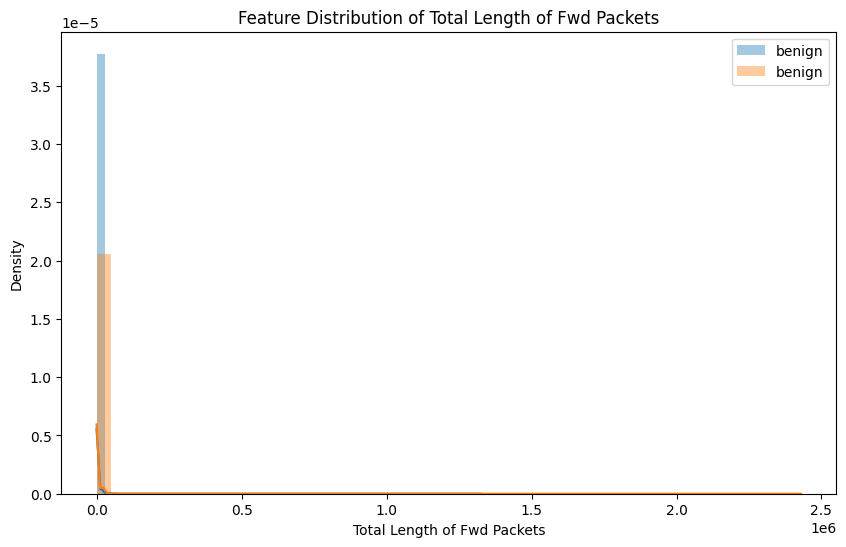

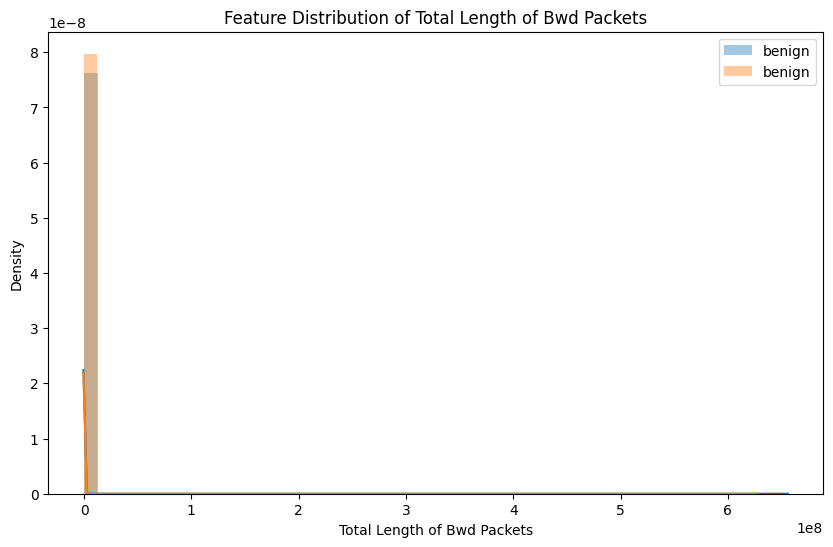

In [25]:
features = ['Destination Port','Flow Duration','Total Fwd Packets','Total Backward Packets','Total Length of Fwd Packets','Total Length of Bwd Packets']

plot_feature_distribution(Monday, Tuesday, 'benign', 'benign', features)
# plot_feature_distribution(Monday, Wednesday, 'benign', 'benign', features)
# plot_feature_distribution(Monday, Tuesday, 'benign', 'benign', features)
# plot_feature_distribution(Monday, Friday, 'benign', 'benign', features)

In [26]:
Week = pd.concat([Monday,Tuesday[Tuesday.Label != 'BENIGN'],Wednesday[Wednesday.Label != 'BENIGN'],
                  Thursday[Thursday.Label != 'BENIGN'],Friday[Friday.Label != 'BENIGN']]).reset_index(drop=True)

Week.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [27]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    start_mem = df.memory_usage(deep=True).sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    # DataFrame
    end_mem = df.memory_usage(deep=True).sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))

    return df

In [28]:
Week = reduce_mem_usage(Week)

Mem. usage decreased to 326.52 Mb (54.2% reduction)


In [29]:
Week.shape

(1087564, 79)

In [30]:
import gc
del Monday,Thursday,Tuesday,Wednesday,Friday
gc.collect()

48617

In [31]:
Week['Label'].value_counts()

BENIGN                        529918
DoS Hulk                      231073
PortScan                      158930
DDoS                          128027
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: Label, dtype: int64

In [32]:
train_df = Week  # Week DataFrame

stats = []

# DataFrame
for col in train_df.columns:
    # stats
    stats.append((col,
                  train_df[col].nunique(),
                  train_df[col].isnull().sum() * 100 / train_df.shape[0],
                  train_df[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                  train_df[col].dtype))

# DataFrame
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])

# DataFrame
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
14,Flow Bytes/s,636148,0.093144,12.418028,float64
0,Destination Port,30856,0.000000,39.912410,int32
59,Bwd Avg Bytes/Bulk,1,0.000000,100.000000,int8
57,Fwd Avg Packets/Bulk,1,0.000000,100.000000,int8
56,Fwd Avg Bytes/Bulk,1,0.000000,100.000000,int8
...,...,...,...,...,...
26,Bwd IAT Mean,302488,0.000000,48.272653,float32
25,Bwd IAT Total,266004,0.000000,48.272653,int32
24,Fwd IAT Min,50728,0.000000,29.059623,int32
23,Fwd IAT Max,221052,0.000000,26.803940,int32


In [33]:
Week = Week.dropna().reset_index(drop = True)
Week['Flow Bytes/s'].isnull().sum()
Week.shape

meaningless_feature = stats_df[stats_df['Unique_values']==1]['Feature'].to_list()
Week = Week.drop(columns=meaningless_feature)

Week.shape

(1086551, 69)

In [34]:
Week.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [35]:
import itertools

def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
    """

    normalize = True
    """
    plt.figure(figsize=(10, 8))  #  10x8

    #
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def DimensionalityReductio(df, features, d=2, target='Label', method='tsne'):
    nonull_df = df.dropna()

    X_std = StandardScaler().fit_transform(nonull_df[features])

    if method == 'tsne':
        tsne = TSNE(n_components=2)
        X_tsne = tsne.fit_transform(X_std)

        X_tsne_data = np.vstack((X_tsne.T, nonull_df[target])).T
        df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])

        plt.figure(figsize=(8, 8))
        sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
        plt.show()
    else:
        if d == 2:
            X_pca = PCA(n_components=2).fit_transform(X_std)
            X_pca = np.vstack((X_pca.T, nonull_df[target])).T

            df_pca = pd.DataFrame(X_pca, columns=['1st_Component', '2nd_Component', 'class'])

            plt.figure(figsize=(8, 8))
            sns.scatterplot(data=df_pca, hue='class', x='1st_Component', y='2nd_Component')
            plt.show()
        else:
            X_pca = PCA(n_components=3).fit_transform(X_std)
            X_pca = np.vstack((X_pca.T, nonull_df[target])).T

            df_pca = pd.DataFrame(X_pca, columns=['1st_Component', '2nd_Component', '3rd_Component', 'class'])

            # float64
            df_pca['1st_Component'] = df_pca['1st_Component'].astype('float64')
            df_pca['2nd_Component'] = df_pca['2nd_Component'].astype('float64')
            df_pca['3rd_Component'] = df_pca['3rd_Component'].astype('float64')

            label_mapping = {"Benign": 1, "Malicious": 2}
            df_pca['class'] = df_pca['class'].map(label_mapping)
            df_pca['class'] = df_pca['class'].astype('float64')

            fig = plt.figure(figsize=(8, 8))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], c=df_pca.iloc[:, 3])
            plt.show()


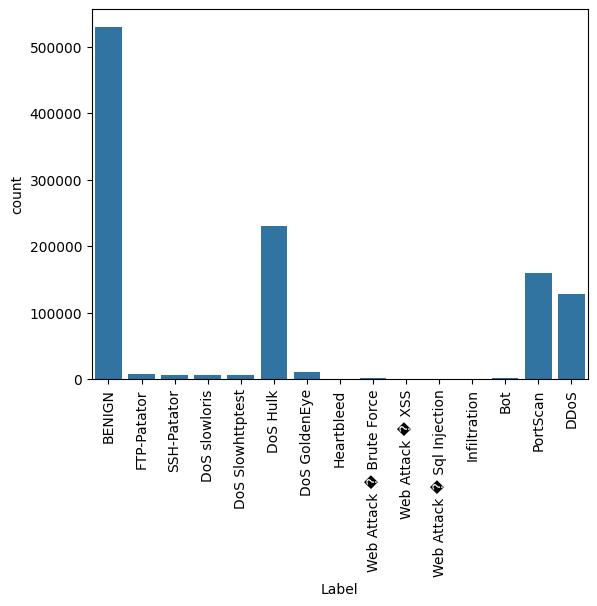

In [37]:
ax = sns.countplot(x='Label', data=Week);
ax.set_xticklabels(Week['Label'].drop_duplicates(),rotation = 90) # grouby dd[column]
plt.show()

In [38]:
label_mapping = {"BENIGN": 0, "DoS Hulk": 1,'PortScan':2,'DDoS':3,'DoS GoldenEye':4,
                 'FTP-Patator':5,'SSH-Patator':6,'DoS slowloris':7,'DoS Slowhttptest':8,'Bot':9,'Web Attack � Brute Force':10,
                 'Web Attack � XSS':11,'Infiltration':12,'Web Attack � Sql Injection':13,'Heartbleed':14}
Week['Label'] = Week['Label'].map(label_mapping)

inf_cols = Week.max()[Week.max() == np.inf].index.to_list()
inf_cols

for i in inf_cols:
    Week[i] = Week[i].apply(lambda x:100000000 if x == np.inf else x)

In [39]:
# Find correlations with the target and sort
correlations = Week.corr()['Label'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(10))
print('\nMost Negative Correlations:\n', correlations.tail(10))

Most Positive Correlations:
 Label                     1.000000
PSH Flag Count            0.321037
Packet Length Variance    0.270180
Bwd Packet Length Std     0.241822
Packet Length Std         0.239397
Bwd Packet Length Max     0.217989
Max Packet Length         0.216969
Average Packet Size       0.212422
Avg Bwd Segment Size      0.211347
Bwd Packet Length Mean    0.211347
Name: Label, dtype: float64

Most Negative Correlations:
 Init_Win_bytes_backward   -0.090934
Fwd Packet Length Min     -0.096819
URG Flag Count            -0.106832
Avg Fwd Segment Size      -0.109322
Fwd Packet Length Mean    -0.109322
Fwd Packet Length Std     -0.113474
Fwd Packet Length Max     -0.123982
Destination Port          -0.170449
Bwd Packet Length Min     -0.293579
Min Packet Length         -0.295933
Name: Label, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split

X = Week.drop(["Label"], axis=1)
X = X[['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Packet Length Variance', 'Bwd Packet Length Std', 'Max Packet Length',
       'Min Packet Length', 'Bwd Packet Length Min', 'Fwd Packet Length Max']]

if torch.cuda.is_available():
    #GPU，
    enc = cuml.preprocessing.LabelEncoder()
    y = enc.fit_transform(Week['Label'])

    ss = StandardScaler()
    X = ss.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=3)
    y_test = np.array(y_test.get())

else:

    y = Week['Label'].values

    ss = StandardScaler()
    X = ss.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
from sklearn.preprocessing import normalize

def func(models, classes):
    model = models
    start = time.perf_counter()

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)

    print('Test Accuracy : \033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))

    cnf_matrix = confusion_matrix(y_test, pred)

    norm_cnf_matrix = normalize(cnf_matrix, norm='l1')
    norm_cnf_matrix = np.around(norm_cnf_matrix, decimals=2)
    plot_confusion_matrix(norm_cnf_matrix, classes=classes, title='Normalized confusion matrix')

    plt.show()

    end = time.perf_counter()
    print(str(end-start))

    return model, acc


Test Accuracy :   97.78075%  
Confusion matrix, without normalization


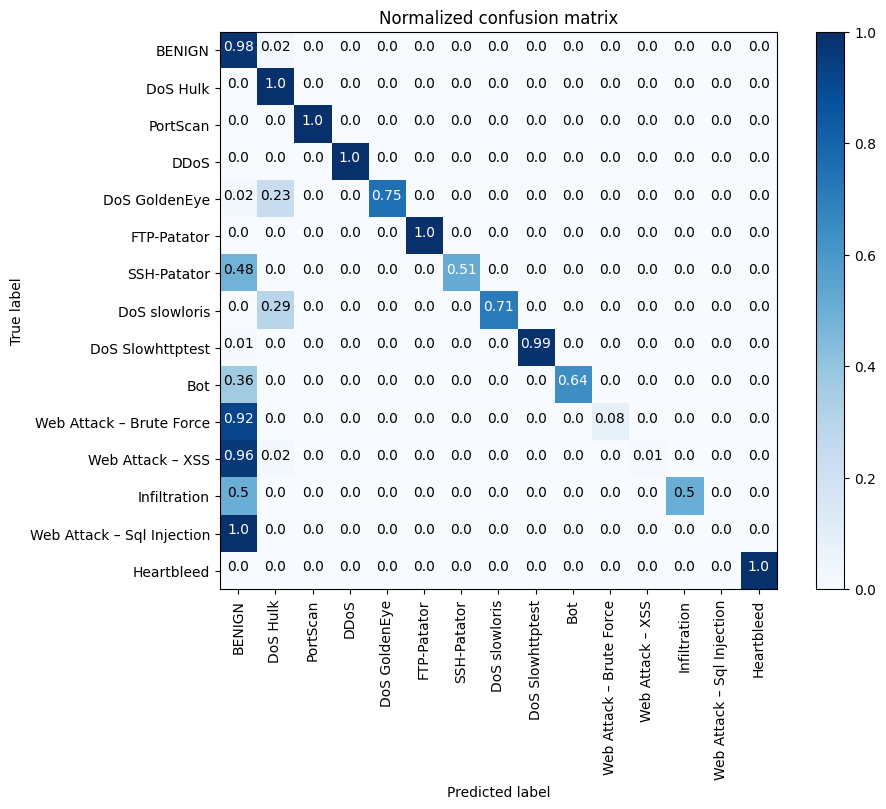

8.535598899999968


In [53]:
if torch.cuda.is_available():
    from cuml.ensemble import RandomForestClassifier

    class_names = ["BENIGN", "DoS Hulk", 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator',
                   'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'Bot', 'Web Attack – Brute Force',
                   'Web Attack – XSS', 'Infiltration', 'Web Attack – Sql Injection', 'Heartbleed']

    rfc, acc_RFC = func(RandomForestClassifier(), class_names)
else:
    from sklearn.ensemble import RandomForestClassifier

    class_names = ["BENIGN", "DoS Hulk", 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator',
                   'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'Bot', 'Web Attack – Brute Force',
                   'Web Attack – XSS', 'Infiltration', 'Web Attack – Sql Injection', 'Heartbleed']

    rfc, acc_RFC = func(RandomForestClassifier(), class_names)

In [54]:
Week['Label'].value_counts()

0     529854
1     230124
2     158930
3     128027
4      10293
5       7938
6       5897
7       5796
8       5499
9       1966
10      1507
11       652
12        36
13        21
14        11
Name: Label, dtype: int64

In [55]:
over_labels = Week[['Label']][Week.Label >= 4]

over_labels_index = over_labels.index.to_list()

over_features = Week.drop(["Label"], axis=1).iloc[over_labels_index]

retain_label_index = Week['Label'][Week.Label < 4].index.to_list()

In [56]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=0)

X_oversampler, y_oversampler = oversampler.fit_resample(over_features, over_labels)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a50e82b0670>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1014, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1184, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 113, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so: cannot open shared object file: No such file or directory


In [57]:
Week_over = pd.concat([X_oversampler, y_oversampler], axis=1)

Week_over = pd.concat([Week_over, Week.iloc[retain_label_index]])

print(Week_over.shape)

(1160158, 69)


Label data distribution before oversampling：


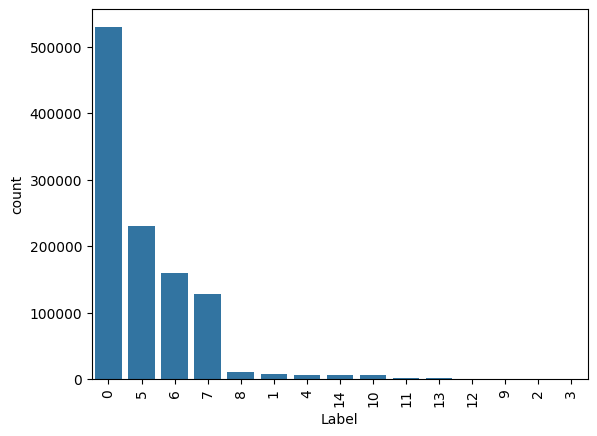

In [58]:
print('Label data distribution before oversampling：')

ax = sns.countplot(x='Label', data=Week)
ax.set_xticklabels(Week['Label'].drop_duplicates().drop_duplicates(), rotation=90)
plt.show()

Label data distribution after oversampling:：


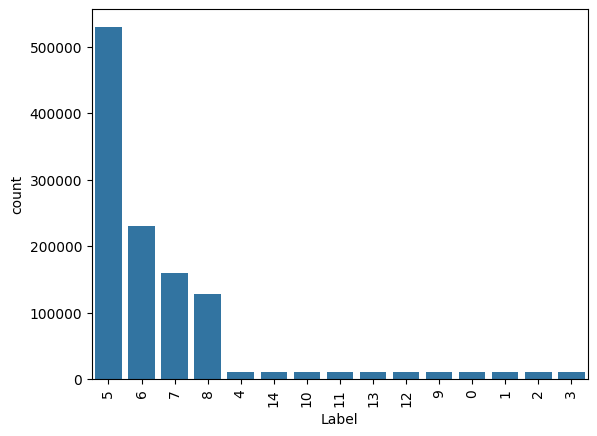

In [59]:
print('Label data distribution after oversampling:：')
ax = sns.countplot(x='Label', data=Week_over);
ax.set_xticklabels(Week_over['Label'].drop_duplicates().drop_duplicates(),rotation = 90)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

X = Week_over.drop(["Label"], axis=1)
X = X[['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets']]

if torch.cuda.is_available():
    enc = cuml.preprocessing.LabelEncoder()
    y = enc.fit_transform(Week_over['Label'])

    ss = StandardScaler()
    X = ss.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=3)
    y_test = np.array(y_test.get())

else:
    y = Week_over['Label'].values

    ss = StandardScaler()
    X = ss.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

Test Accuracy :   96.77142%  
Confusion matrix, without normalization


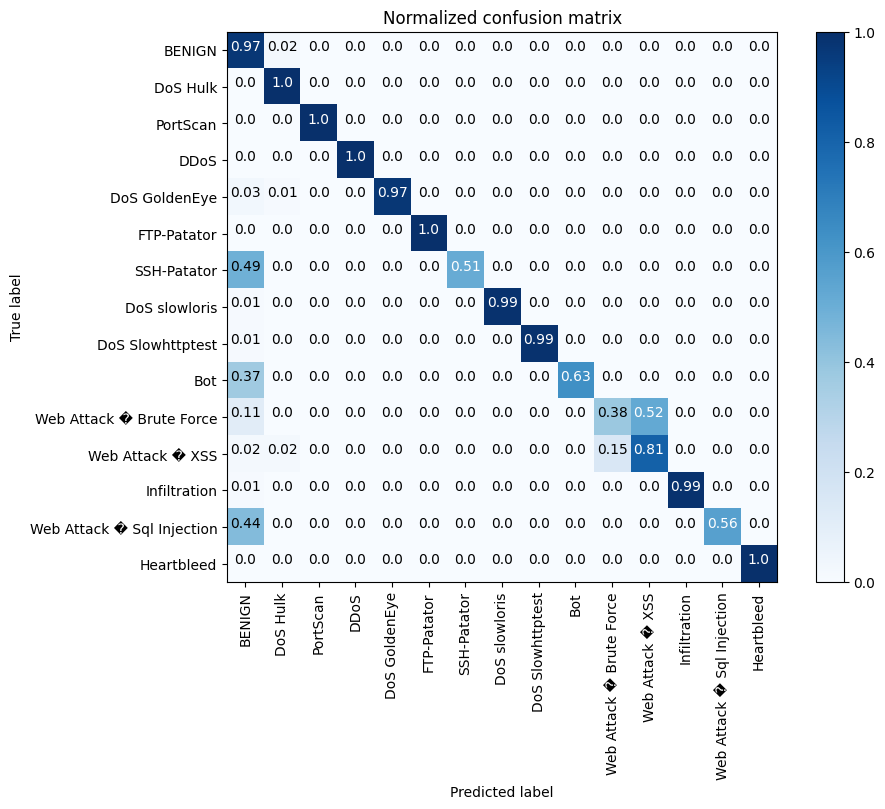

5.7511445119998825


In [61]:
if torch.cuda.is_available():

    from cuml.ensemble import RandomForestClassifier

    class_names = ["BENIGN", "DoS Hulk",'PortScan','DDoS','DoS GoldenEye','FTP-Patator','SSH-Patator','DoS slowloris','DoS Slowhttptest','Bot','Web Attack � Brute Force',
                     'Web Attack � XSS','Infiltration','Web Attack � Sql Injection','Heartbleed']

    rfc,acc_RFC =func(RandomForestClassifier(),class_names)

else:

    from sklearn.ensemble import RandomForestClassifier

    class_names = ["BENIGN", "DoS Hulk",'PortScan','DDoS','DoS GoldenEye','FTP-Patator','SSH-Patator','DoS slowloris','DoS Slowhttptest','Bot','Web Attack � Brute Force',
                     'Web Attack � XSS','Infiltration','Web Attack � Sql Injection','Heartbleed']

    rfc,acc_RFC =func(RandomForestClassifier(),class_names)

In [62]:
from sklearn.model_selection import train_test_split

X = Week_over.drop(["Label"],axis=1)
# X= X[['Destination Port','Flow Duration','Total Fwd Packets','Total Backward Packets','Total Length of Fwd Packets','Total Length of Bwd Packets']]

if torch.cuda.is_available():

    enc = cuml.preprocessing.LabelEncoder()
    y = enc.fit_transform(Week_over['Label'])

    ss = StandardScaler()
    X = ss.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X,y.values,test_size=0.3, random_state=3)
    y_test = np.array(y_test.get())

else:
    y = Week_over['Label'].values

    ss = StandardScaler()
    X = ss.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

Test Accuracy :   97.50293%  
Confusion matrix, without normalization


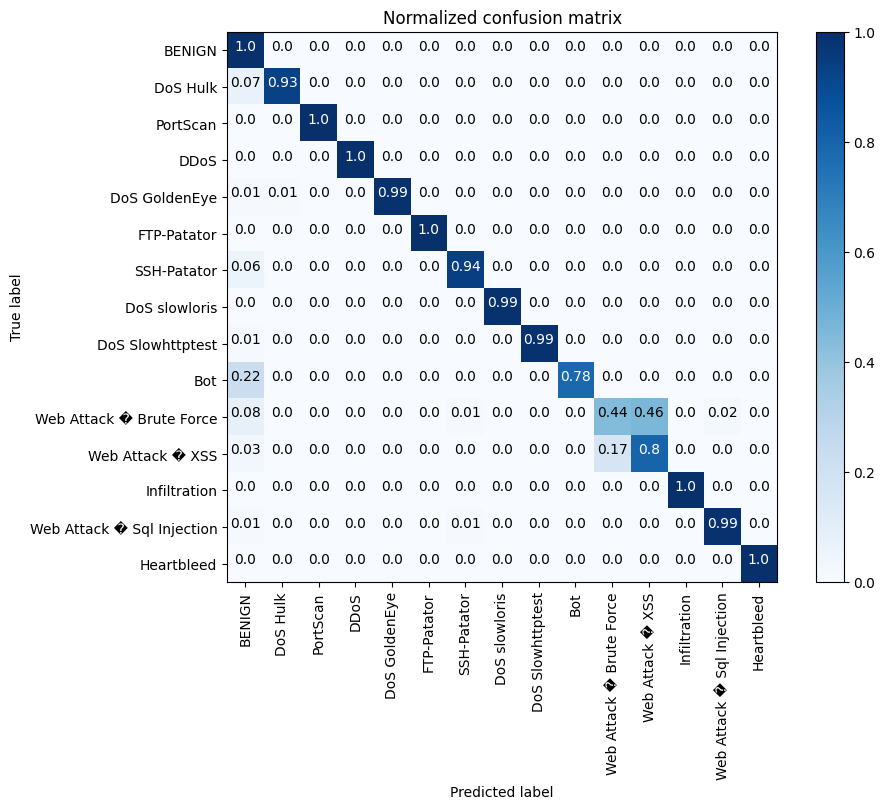

13.471265756999856


In [63]:
if torch.cuda.is_available():

    from cuml.ensemble import RandomForestClassifier

    class_names = ["BENIGN", "DoS Hulk",'PortScan','DDoS','DoS GoldenEye','FTP-Patator','SSH-Patator','DoS slowloris','DoS Slowhttptest','Bot','Web Attack � Brute Force',
                     'Web Attack � XSS','Infiltration','Web Attack � Sql Injection','Heartbleed']

    rfc,acc_RFC =func(RandomForestClassifier(),class_names)

else:

    from sklearn.ensemble import RandomForestClassifier

    class_names = ["BENIGN", "DoS Hulk",'PortScan','DDoS','DoS GoldenEye','FTP-Patator','SSH-Patator','DoS slowloris','DoS Slowhttptest','Bot','Web Attack � Brute Force',
                     'Web Attack � XSS','Infiltration','Web Attack � Sql Injection','Heartbleed']

    rfc,acc_RFC =func(RandomForestClassifier(),class_names)

In [64]:
from sklearn.model_selection import train_test_split

X = Week_over.drop(["Label"],axis=1)
# X= X[['Destination Port','Flow Duration','Total Fwd Packets','Total Backward Packets','Total Length of Fwd Packets','Total Length of Bwd Packets']]


y = Week_over['Label'].values

ss = StandardScaler()
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

Test Accuracy :   99.72906%  
Confusion matrix, without normalization


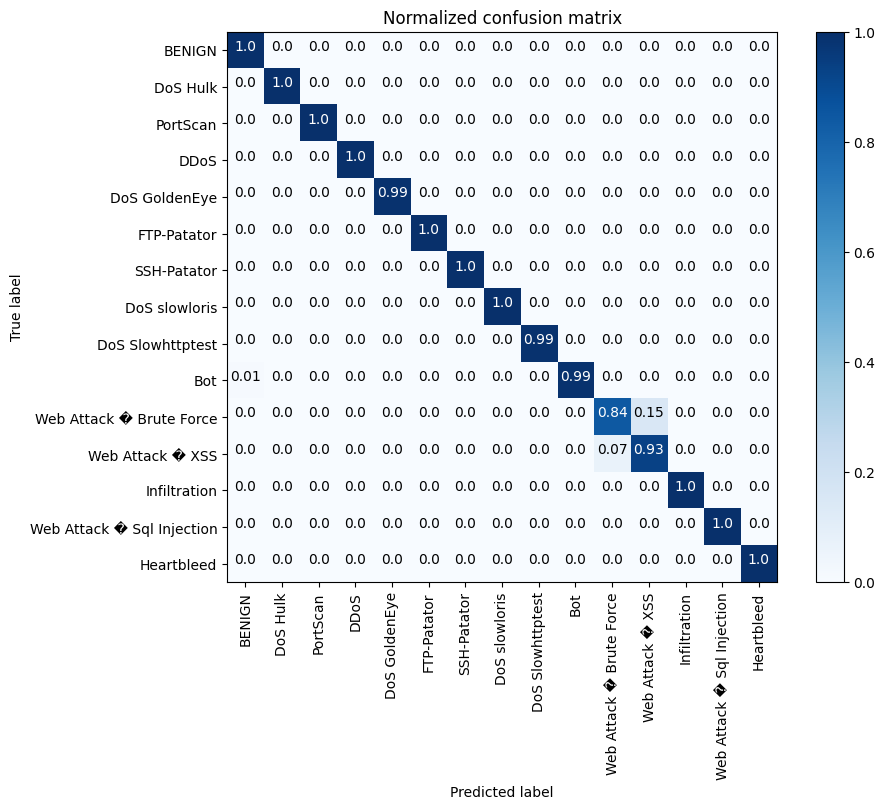

338.8994889989999


In [65]:
from sklearn.ensemble import RandomForestClassifier

class_names = ["BENIGN", "DoS Hulk",'PortScan','DDoS','DoS GoldenEye','FTP-Patator','SSH-Patator','DoS slowloris','DoS Slowhttptest','Bot','Web Attack � Brute Force',
                 'Web Attack � XSS','Infiltration','Web Attack � Sql Injection','Heartbleed']

rfc,acc_RFC =func(RandomForestClassifier(),class_names)

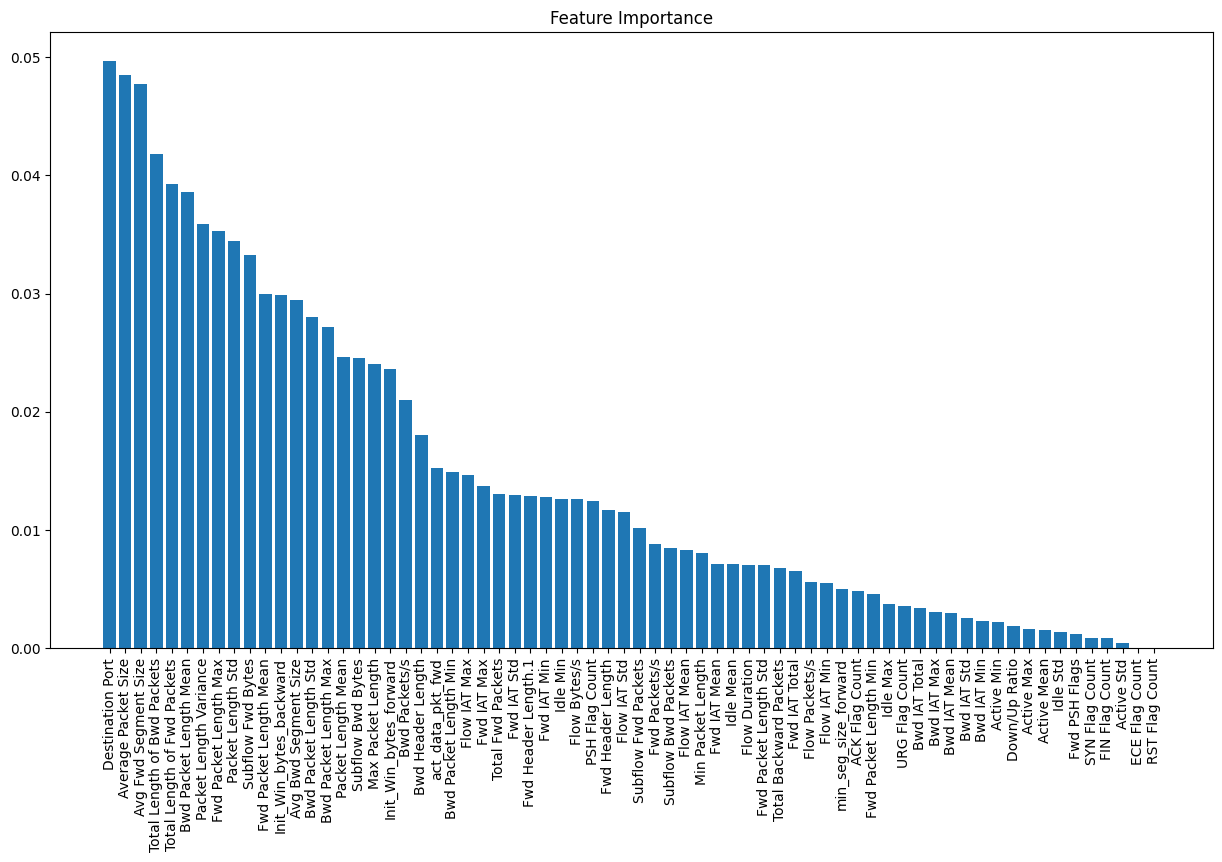

In [66]:
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

names = [Week.columns[i] for i in indices]

plt.figure(figsize=(15, 8))
plt.title("Feature Importance")

plt.bar(range(len(names)), importances[indices])
plt.xticks(range(len(names)), names, rotation=90)
plt.show()

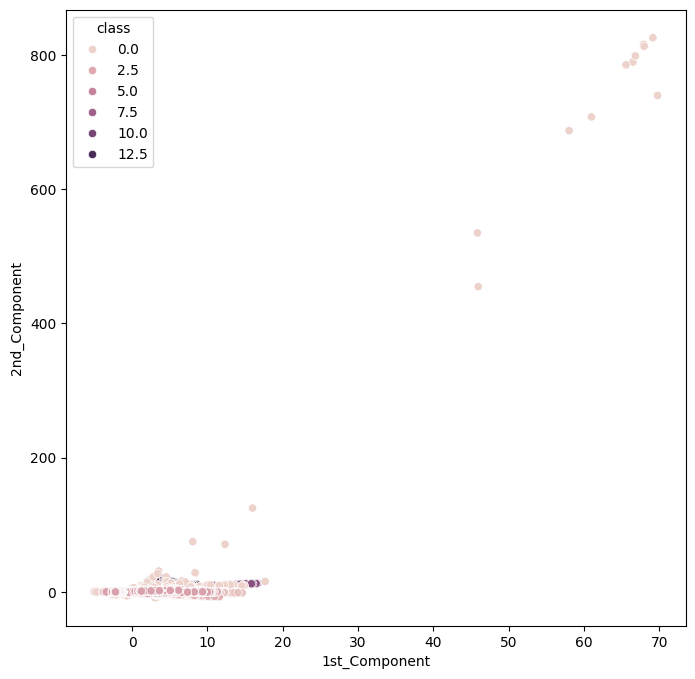

In [67]:
DimensionalityReductio(Week_over,Week_over.columns,method='pca')